In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_excel('Dataset/Dataset.xlsx',
                          sheet_name=0,
                          header=0,
                          index_col=False,
                          keep_default_na=True)

In [3]:
customers.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [4]:
customers.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year,ClaimSize
count,11565.000000,11565.000000,11560.000000,11565.000000,11565.000000,11565.000000,11565.000000,11559.000000,11565.000000,11565.000000
mean,2.784003,2.701167,39.899567,0.059230,7710.474449,8.469780,407.617812,2.493468,1994.865975,22955.978035
std,1.284854,1.258153,13.590556,0.236066,4453.762219,4.618952,43.397393,1.118102,0.801798,26988.811719
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000,0.000000
25%,2.000000,2.000000,31.000000,0.000000,3851.000000,4.000000,400.000000,1.000000,1994.000000,4148.845001
50%,3.000000,3.000000,38.000000,0.000000,7712.000000,8.000000,400.000000,3.000000,1995.000000,8130.994563
75%,4.000000,4.000000,49.000000,0.000000,11542.000000,12.000000,400.000000,3.000000,1996.000000,46299.646944
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000,141394.159289


In [5]:
customers['AddressChange_Claim'].value_counts()

no change         10715
4 to 8 years        496
2 to 3 years        222
1 year              128
under 6 months        4
Name: AddressChange_Claim, dtype: int64

In [6]:
customers[customers['FraudFound_P']==1]['AddressChange_Claim'].value_counts()

no change         607
2 to 3 years       40
4 to 8 years       27
1 year              8
under 6 months      3
Name: AddressChange_Claim, dtype: int64

In [7]:
customers['NumberOfSuppliments'].value_counts()

none           5330
more than 5    2875
1 to 2         1846
3 to 5         1514
Name: NumberOfSuppliments, dtype: int64

In [8]:
customers[customers['FraudFound_P']==1]['NumberOfSuppliments'].value_counts()

none           357
more than 5    142
1 to 2         113
3 to 5          73
Name: NumberOfSuppliments, dtype: int64

In [9]:
customers['AgentType'].value_counts()

External    11394
Internal      171
Name: AgentType, dtype: int64

In [10]:
customers[customers['FraudFound_P']==1]['AgentType'].value_counts()

External    681
Internal      4
Name: AgentType, dtype: int64

In [11]:
customers['PoliceReportFiled'].value_counts()

No     11235
Yes      330
Name: PoliceReportFiled, dtype: int64

In [12]:
customers[customers['FraudFound_P']==1]['PoliceReportFiled'].value_counts()

No     672
Yes     13
Name: PoliceReportFiled, dtype: int64

In [13]:
customers['WitnessPresent'].value_counts()

No     11497
Yes       68
Name: WitnessPresent, dtype: int64

In [14]:
customers[customers['FraudFound_P']==1]['WitnessPresent'].value_counts()

No     683
Yes      2
Name: WitnessPresent, dtype: int64

In [15]:
customers[(customers['WitnessPresent']=='Yes') & (customers['PoliceReportFiled']=='Yes')]['FraudFound_P']

1182     0
1504     0
1802     0
1933     0
2064     0
2074     0
2347     0
2881     0
3002     0
3794     0
3888     0
4693     0
4897     0
6403     0
7037     0
7113     0
7241     0
7320     0
8285     0
8346     0
8824     0
9339     0
9478     0
10330    0
10568    0
10604    0
Name: FraudFound_P, dtype: int64

##Fraud commited with respect to Gender

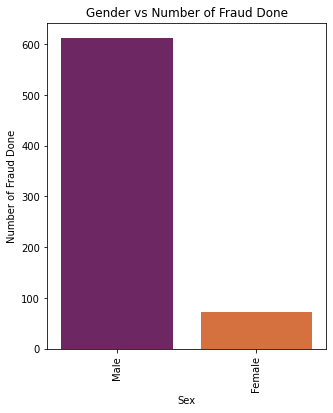

Percentage of Fraud Done from Female Insurance Policy Holder 4.06 %
Percentage of Fraud Done from Male Insurance Policy Holder 6.27 %


In [16]:
plt.subplots(figsize=(5, 6))
sns.countplot(x='Sex',
              data=customers[customers['FraudFound_P']==1],
              palette='inferno',
              order=customers['Sex'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud Done')
plt.title('Gender vs Number of Fraud Done')

plt.show()

print('Percentage of Fraud Done from Female Insurance Policy Holder', format((73/1797)*100, '.2f'), '%')
print('Percentage of Fraud Done from Male Insurance Policy Holder', format((612/9767)*100, '.2f'), '%')

##Claim and Fraud with respect to the Age of the customer



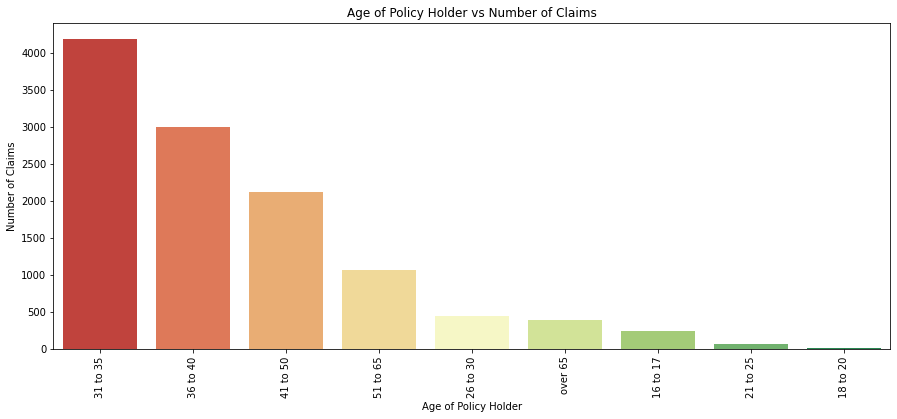

,Age Group,Claims,Percentage-%
0,31 to 35,4199,36.31
1,36 to 40,3008,26.01
2,41 to 50,2122,18.35
3,51 to 65,1070,9.25
4,26 to 30,445,3.85
5,over 65,388,3.35
6,16 to 17,247,2.14
7,21 to 25,73,0.63
8,18 to 20,13,0.11


In [17]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers,
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Claims')

plt.show()

x = customers['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])

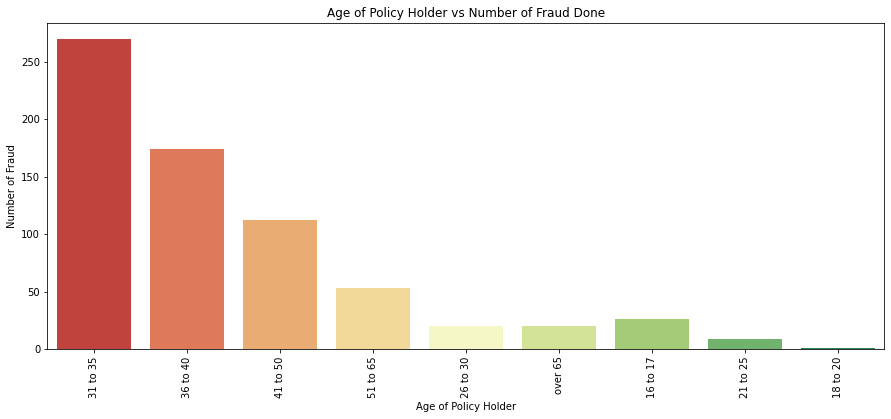

,Age Group,Claims,Percentage-%
0,31 to 35,270,39.42
1,36 to 40,174,25.40
2,41 to 50,112,16.35
3,51 to 65,53,7.74
4,16 to 17,26,3.80
5,26 to 30,20,2.92
6,over 65,20,2.92
7,21 to 25,9,1.31
8,18 to 20,1,0.15


In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Fraud Done')

plt.show()

x = customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array,columns = ['Age Group', 'Claims', 'Percentage-%'])    

###From the above two graph we get that policy holders who have age greater than 50 year have low chance of doing fraud

##Age of Policy Holder and their Relationship Status vs Fraud

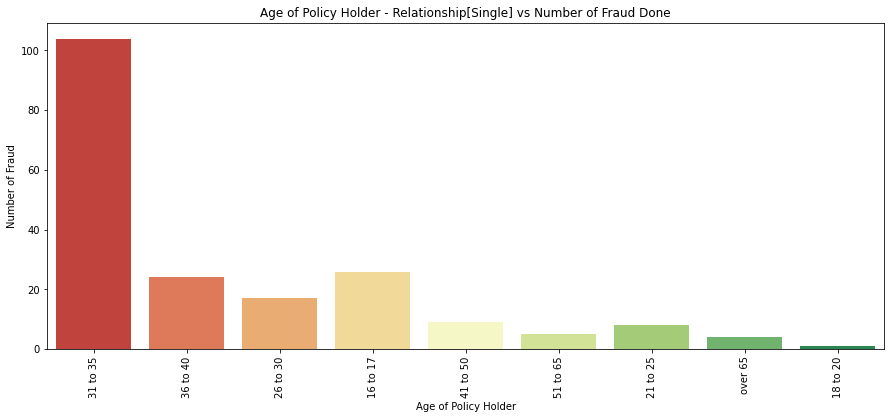

,Age Group,Claims,Percentage-%
0,31 to 35,104,52.53
1,16 to 17,26,13.13
2,36 to 40,24,12.12
3,26 to 30,17,8.59
4,41 to 50,9,4.55
5,21 to 25,8,4.04
6,51 to 65,5,2.53
7,over 65,4,2.02
8,18 to 20,1,0.51


In [19]:
plt.subplots(figsize=(15, 6))
single = customers[customers['MaritalStatus']=='Single']
sns.countplot(x='AgeOfPolicyHolder',
              data=single[single['FraudFound_P']==1],
              palette='RdYlGn',
              order=single['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder - Relationship[Single] vs Number of Fraud Done')

plt.show()

x = single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])   

###From this graph we can observe that single people having age between 31 to 35 have high chance of doing fraud

##Claim and Fraud with respect to the Vehicle category


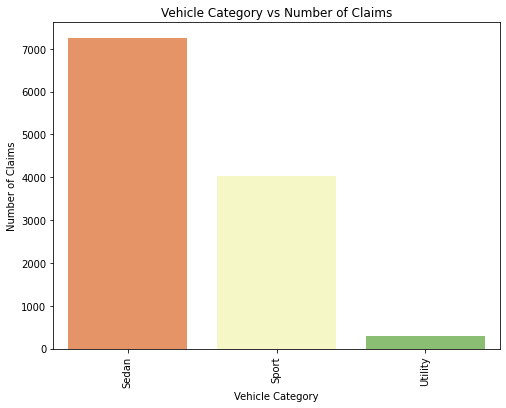

,Vehicle Category,Claims,Percentage-%
0,Sedan,7253,62.72
1,Sport,4024,34.79
2,Utility,288,2.49


In [20]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers,
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Claims')

plt.show()

x = customers['VehicleCategory'].value_counts().index
y = np.array(customers['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i],'.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Claims', 'Percentage-%'])    

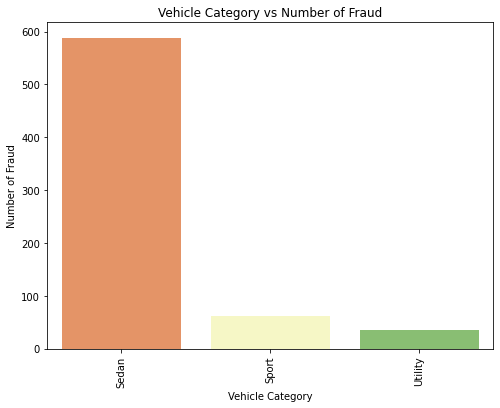

,Vehicle Category,Fraud,Percentage-%
0,Sedan,588,85.84
1,Sport,61,8.91
2,Utility,36,5.26


In [21]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Fraud', 'Percentage-%'])   

##Claim and Fraud with respect to the Policy type

In [22]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [23]:
customers['PolicyType'].value_counts()

Sedan - Collision       4186
Sedan - Liability       3742
Sedan - All Perils      3067
Sport - Collision        262
Utility - All Perils     251
Utility - Collision       24
Sport - All Perils        19
Utility - Liability       13
Sport - Liability          1
Name: PolicyType, dtype: int64

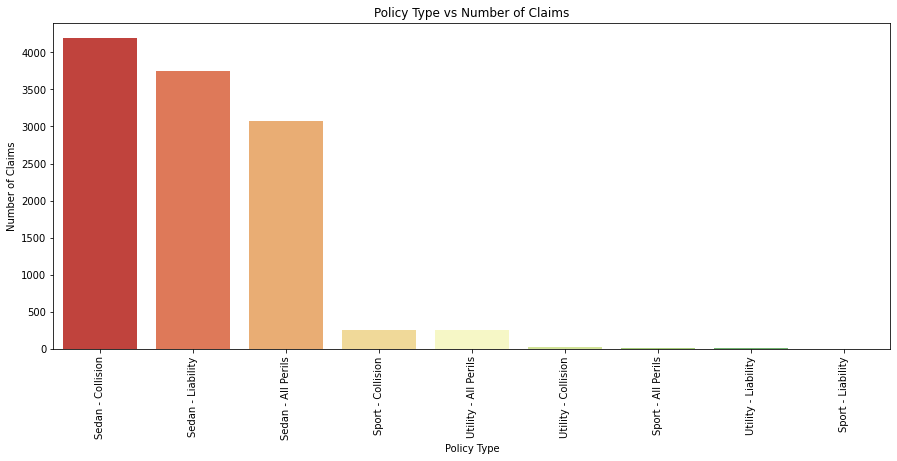

,PolicyType,Claims,Percentage-%
0,Sedan - Collision,4186,36.20
1,Sedan - Liability,3742,32.36
2,Sedan - All Perils,3067,26.52
3,Sport - Collision,262,2.27
4,Utility - All Perils,251,2.17
5,Utility - Collision,24,0.21
6,Sport - All Perils,19,0.16
7,Utility - Liability,13,0.11
8,Sport - Liability,1,0.01


In [24]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers,
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Claims')

plt.show()

x = customers['PolicyType'].value_counts().index
y = np.array(customers['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Claims', 'Percentage-%'])   

In [25]:
customers[customers['FraudFound_P']==1]['PolicyType'].value_counts()

Sedan - All Perils      307
Sedan - Collision       281
Sport - Collision        34
Utility - All Perils     33
Sedan - Liability        27
Utility - Collision       3
Name: PolicyType, dtype: int64

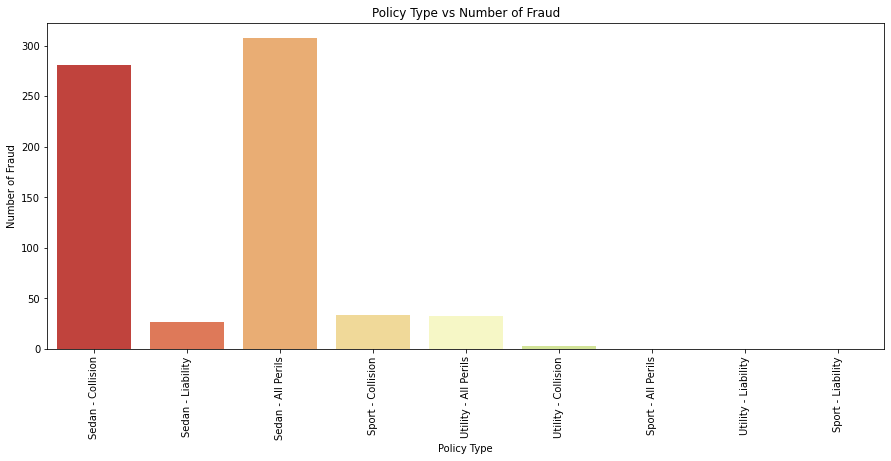

,PolicyType,Fraud,Percentage-%
0,Sedan - All Perils,307,44.82
1,Sedan - Collision,281,41.02
2,Sport - Collision,34,4.96
3,Utility - All Perils,33,4.82
4,Sedan - Liability,27,3.94
5,Utility - Collision,3,0.44


In [26]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Fraud', 'Percentage-%'])   

###From this two graph we can see their more chance of fraud for people having policy type All Perlis and Car Type Sedan or Utility

##Claim and Fraud with respect to the number of Vehicle owned by the customer

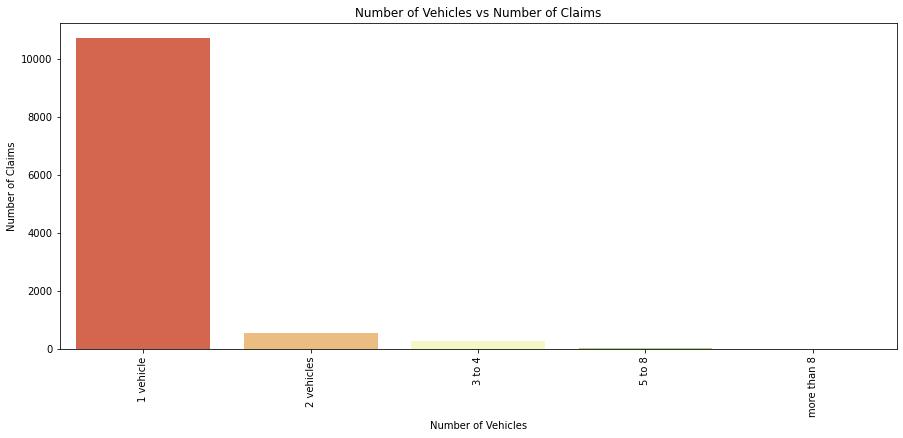

,Number of Vehicles,Claims,Percentage-%
0,1 vehicle,10698,92.50
1,2 vehicles,559,4.83
2,3 to 4,288,2.49
3,5 to 8,19,0.16
4,more than 8,1,0.01


In [27]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers,
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicles vs Number of Claims')

plt.show()

x = customers['NumberOfCars'].value_counts().index
y = np.array(customers['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of Vehicles', 'Claims', 'Percentage-%'])   

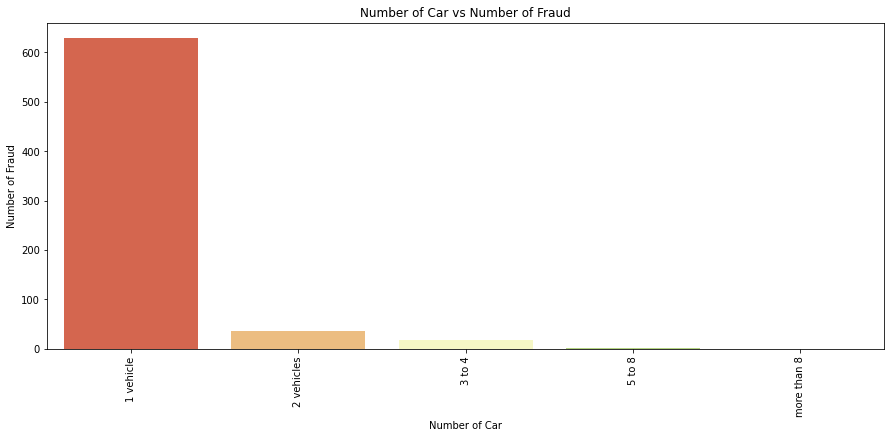

,Number of Vehicles,Fraud,Percentage-%
0,1 vehicle,628,91.68
1,2 vehicles,37,5.40
2,3 to 4,19,2.77
3,5 to 8,1,0.15


In [28]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Number of Car')
plt.title('Number of Car vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of Vehicles', 'Fraud', 'Percentage-%'])   

##Number of Frauds with respect to Relationship Status [Single] and Number of Cars owned

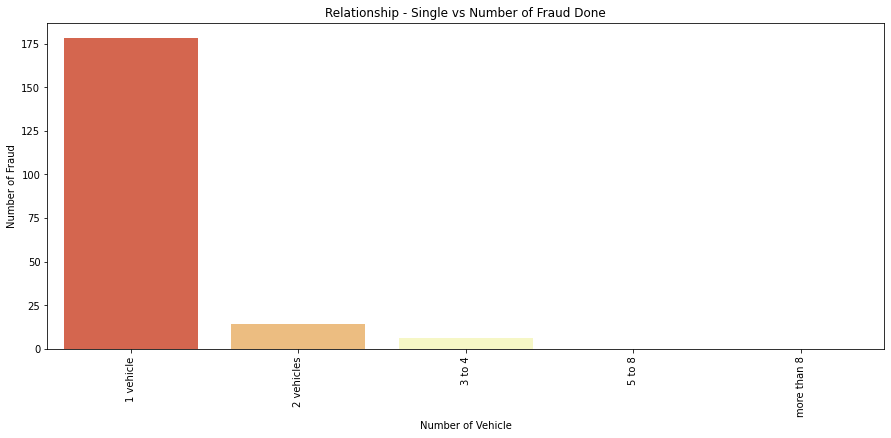

,Number of Vehicles,Claims,Percentage-%
0,1 vehicle,178,89.90
1,2 vehicles,14,7.07
2,3 to 4,6,3.03


In [29]:
plt.subplots(figsize=(15, 6))
single = customers[customers['MaritalStatus']=='Single']
sns.countplot(x='NumberOfCars',
              data=single[single['FraudFound_P']==1],
              palette='RdYlGn',
              order=single['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Number of Vehicle')
plt.title('Relationship - Single vs Number of Fraud Done')

plt.show()

x = single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y = np.array(single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of Vehicles', 'Claims', 'Percentage-%'])    

## Claims Amount, Vehicle Price | Claim Size Percent

In [30]:
customers['VehiclePrice'].value_counts()

20000 to 29000     6112
30000 to 39000     2640
more than 69000    1605
less than 20000     800
40000 to 59000      349
60000 to 69000       59
Name: VehiclePrice, dtype: int64

In [31]:
vehicle_price_dict = {
    'less than 20000': 20000,
    '20000 to 29000': 29000,
    '30000 to 39000': 39000,
    '40000 to 59000': 59000,
    '60000 to 69000': 69000,
    'more than 69000': 100000
}

claim_trustability = []

for index, row in customers.iterrows():
    ct = row['ClaimSize']/vehicle_price_dict.get(row['VehiclePrice']) * 100
    claim_trustability.append(ct)

customers['Claim_Amount_Percent'] = claim_trustability

In [32]:
claim_amount_100 = customers[customers['Claim_Amount_Percent']>100]
claim_amount_100['VehiclePrice'].value_counts()

30000 to 39000     1128
20000 to 29000      178
40000 to 59000       76
60000 to 69000       23
less than 20000       5
Name: VehiclePrice, dtype: int64

In [33]:
claim_amount_100.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Claim_Amount_Percent
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,12,13,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275,356.623397
18,Mar,3,Thursday,Honda,Urban,Thursday,Jun,4,Male,Married,21.0,Policy Holder,Sedan - Collision,Sedan,30000 to 39000,0,27,1,400,2.0,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,more than 5,no change,1 vehicle,1994,Collision,84964.753582,217.858343
21,Mar,2,Friday,Dodge,Urban,Saturday,Mar,2,Male,Married,47.0,Policy Holder,Sedan - Collision,Sedan,30000 to 39000,0,31,2,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,Internal,none,no change,1 vehicle,1994,Collision,54233.789823,139.061000
35,May,4,Friday,Pontiac,Urban,Friday,May,4,Male,Married,49.0,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,51,14,400,2.0,more than 30,more than 30,more than 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,52494.337422,134.600865
38,Jun,4,Tuesday,Pontiac,Urban,Tuesday,Jun,4,Male,Single,45.0,Policy Holder,Sedan - Collision,Sedan,30000 to 39000,0,55,8,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,58488.924392,149.971601


In [34]:
claim_amount_100[claim_amount_100['FraudFound_P']==1]['VehiclePrice'].value_counts()

30000 to 39000    57
20000 to 29000     9
40000 to 59000     5
Name: VehiclePrice, dtype: int64

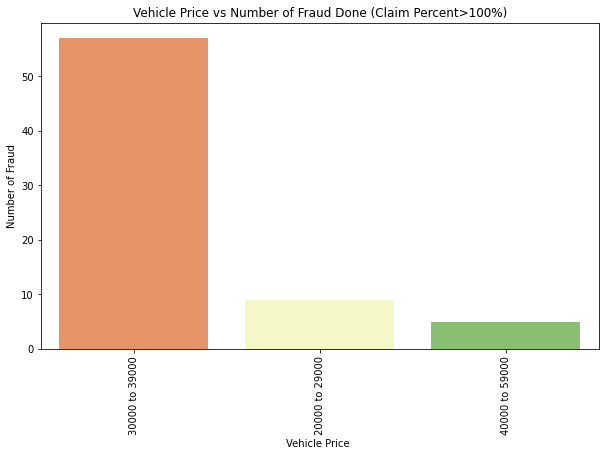

In [35]:
claim_amount_100_vehicle = claim_amount_100[claim_amount_100['VehiclePrice']!='more than 69000']
fraud_claim = claim_amount_100_vehicle[claim_amount_100_vehicle['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='VehiclePrice',
              data=fraud_claim,
              palette='RdYlGn',
              order=fraud_claim['VehiclePrice'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Vehicle Price ')
plt.title('Vehicle Price vs Number of Fraud Done (Claim Percent>100%)')

plt.show()

###Vehicle having price between 30000 to 39000 and whose claim percent is greater than 100 has more chance of commiting fraud

##Frauds and Claims made with respect to Age of Vehicle, Relationship Status [Single]

In [36]:
customers['AgeOfPolicyHolder'].value_counts()

31 to 35    4199
36 to 40    3008
41 to 50    2122
51 to 65    1070
26 to 30     445
over 65      388
16 to 17     247
21 to 25      73
18 to 20      13
Name: AgeOfPolicyHolder, dtype: int64

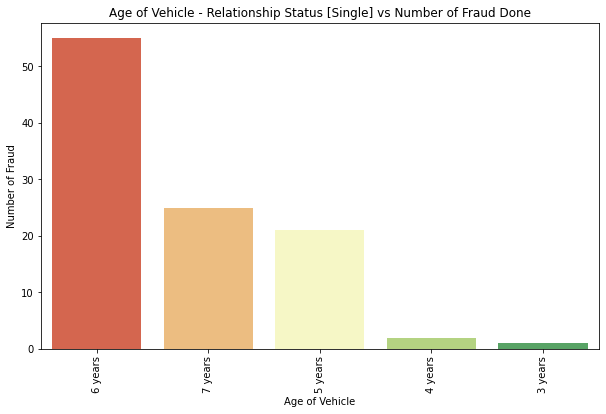

In [37]:
single = customers[customers['MaritalStatus']=='Single']
single = single[single['AgeOfPolicyHolder']=='31 to 35']
fraud = single[single['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=fraud,
              palette='RdYlGn',
              order=fraud['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle - Relationship Status [Single] vs Number of Fraud Done')

plt.show()

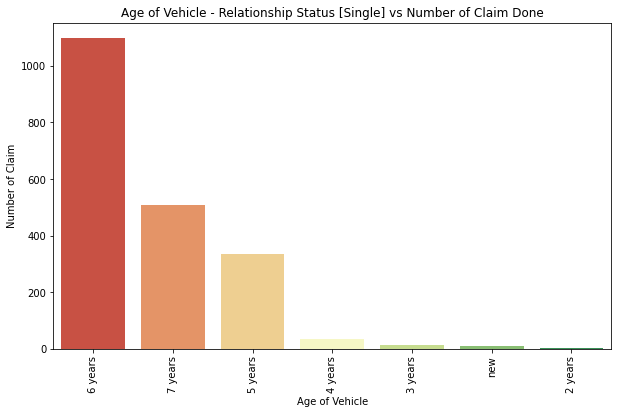

In [38]:
single = customers[customers['MaritalStatus']=='Single']
single = single[single['AgeOfPolicyHolder']=='31 to 35']
fraud = single[single['FraudFound_P']==1]

plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=single,
              palette='RdYlGn',
              order=single['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claim')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle - Relationship Status [Single] vs Number of Claim Done')

plt.show()

##Claims and Fraud done based on Age of Vehicle

In [39]:
customers['AgeOfVehicle'].value_counts()

7 years        4388
more than 7    2993
6 years        2581
5 years         990
new             285
4 years         176
3 years         100
2 years          52
Name: AgeOfVehicle, dtype: int64

In [40]:
customers[customers['FraudFound_P']==1]['AgeOfVehicle'].value_counts()

7 years        260
6 years        165
more than 7    148
5 years         60
new             26
4 years         15
3 years          9
2 years          2
Name: AgeOfVehicle, dtype: int64

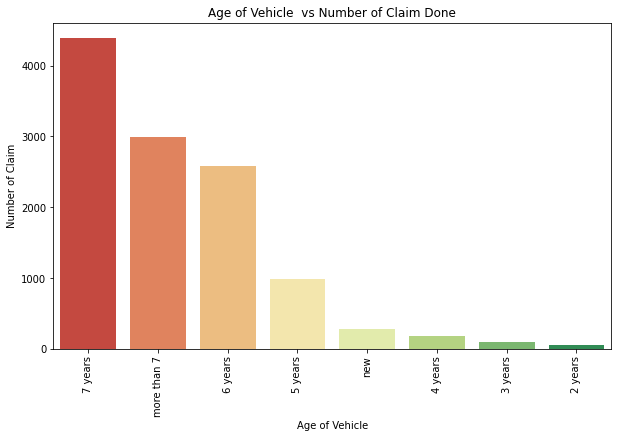

In [41]:
plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=customers,
              palette='RdYlGn',
              order=customers['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claim')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle  vs Number of Claim Done')

plt.show()

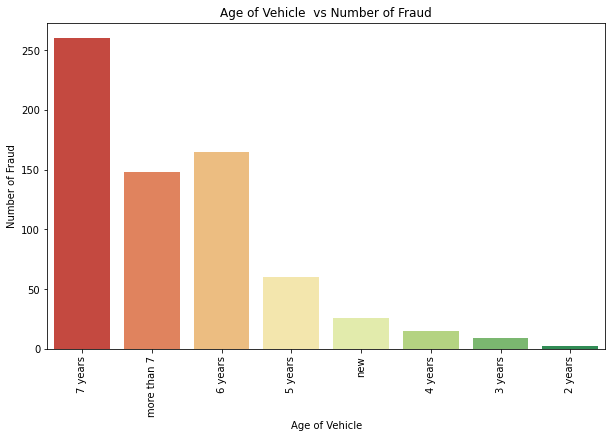

In [42]:
plt.subplots(figsize=(10, 6))

sns.countplot(x='AgeOfVehicle',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['AgeOfVehicle'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Vehicle')
plt.title('Age of Vehicle  vs Number of Fraud')

plt.show()

In [43]:
daydict = {
       1 : 'Monday',
       2 : 'Tuesday',
       3 : 'Wednesday',
       4 : 'Thursday',
       5 : 'Friday',
       6 : 'Saturday',
       7 : 'Sunday'
}

In [44]:
def parse_date(year, month_name, week_month, day):
    month = month_name
    first_date = datetime(year, month, 1)
    first_day = first_date.isoweekday()
    first_week_number = first_date.isocalendar()[1]
    if (first_week_number==52):
        first_week_number = 1
    week_number = first_week_number + week_month - 1
    string_date = str(year) + '-' + str(week_number) + '-' + daydict.get(day)
    date = datetime.strptime(string_date, '%Y-%U-%A')
    return date

In [45]:
def convert_month(month):
    
    if month=='Jan':
        return 1
    elif month=='Feb':
        return 2
    elif month=='Mar':
        return 3
    elif month=='Apr':
        return 4
    elif month=='May':
        return 5
    elif month=='Jun':
        return 6
    elif month=='Jul':
        return 7
    elif month=='Aug':
        return 8
    elif month=='Sep':
        return 9
    elif month=='Oct':
        return 10
    elif month=='Nov':
        return 11
    elif month=='Dec':
        return 12
    
customers['Month'] = customers['Month'].apply(convert_month)
customers['MonthClaimed'] = customers['MonthClaimed'].apply(convert_month)  

In [46]:
def convert_day(day):
    
    if day=='Monday':
        return 1
    elif day=='Tuesday':
        return 2
    elif day=='Wednesday':
        return 3
    elif day=='Thursday':
        return 4
    elif day=='Friday':
        return 5
    elif day=='Saturday':
        return 6
    elif day=='Sunday':
        return 7

customers['DayOfWeek'] = customers['DayOfWeek'].apply(convert_day)
customers['DayOfWeekClaimed'] = customers['DayOfWeekClaimed'].apply(convert_day)   

In [47]:
customers['Month'].value_counts()

1     1056
5     1028
3      995
6      981
10     973
12     970
4      959
9      952
2      949
7      938
11     913
8      851
Name: Month, dtype: int64

In [48]:
customers[customers['DayOfWeekClaimed'].isna()]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Claim_Amount_Percent
1146,7,2,1,Honda,Rural,NaN,NaN,1,Male,Single,0.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2.0,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,70530.646951,70.530647


In [49]:
customers['DayOfWeekClaimed'].fillna(1, inplace=True)

In [50]:
customers.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            1
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
Claim_Amount_Percent    0
dtype: int64

In [51]:
customers['MonthClaimed'].fillna(7, inplace=True)

In [52]:
from datetime import datetime, timedelta
gap = []
accident_dates = []
claim_dates = []

for index, row in customers.iterrows():
    accident_year = row['Year']
    claim_year = accident_year if (row['Month'] <= int(row['MonthClaimed'])) else accident_year + 1
    accident_date = parse_date(accident_year, row['Month'], row['WeekOfMonth'], row['DayOfWeek'])
    claim_date = parse_date(claim_year, int(row['MonthClaimed']), row['WeekOfMonthClaimed'], row['DayOfWeekClaimed'])
    accident_dates.append(accident_date)
    claim_dates.append(claim_date)
    gap.append(abs((claim_date - accident_date).days))

In [53]:
customers['Claim_Gap'] = gap

In [54]:
customers[customers['WitnessPresent']=='Yes'].shape

(68, 36)

In [55]:
claim_gap_10 = customers[customers['Claim_Gap']>10]
print(claim_gap_10.shape)
print(claim_gap_10[claim_gap_10['FraudFound_P']==1].shape)

(2803, 36)
(222, 36)
